In [1]:
# Bibliotecas utilizadas
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
iris = datasets.load_iris() # Importa o modelo do sklearn.datasets

In [2]:
# Converte o modelo de "sklearn.utils.Bunch" para "pandas.core.frame.DataFrame"
df = pd.DataFrame(data=iris.data,columns=iris.feature_names) 
# Renomeia os valores da coluna 
df.rename(columns={'sepal length (cm)' : 'sepal_length', 'sepal width (cm)' : 'sepal_width', 'petal length (cm)' : 'petal_length', 'petal width (cm)' : 'petal_width'}, inplace=True)
y_df = pd.DataFrame(data=iris.target,columns=["labels"])

In [3]:
# EDA - Exploratory Data Analysis

df.head()
# df.describe()
# df.info()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


array([[<AxesSubplot:xlabel='sepal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='petal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_

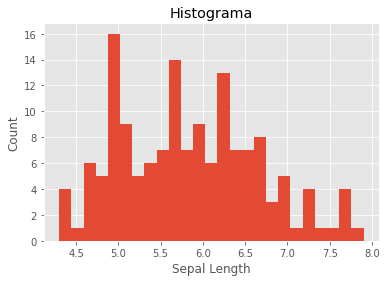

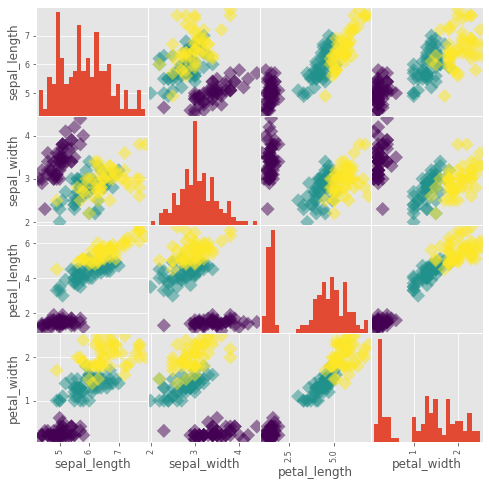

In [4]:
# https://pandas.pydata.org/docs/user_guide/visualization.html#

# Histograma sepal_length
plt.close('all')
plt.figure()
plt.grid
plt.xlabel('Sepal Length')
plt.ylabel('Count')
plt.title('Histograma')
df.sepal_length.hist(bins=25)

# Scatter Matrix
# https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html
pd.plotting.scatter_matrix(df,figsize=[8,8],c=iris.target,s=100,marker='D',hist_kwds={'bins' : 25})


In [5]:
# Criando o modelo KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

# Divide o dataset 20% valuation e 80% treino
X_train,X_val,y_train,y_val = train_test_split(X,y,train_size = 0.2, random_state=42,stratify=y)

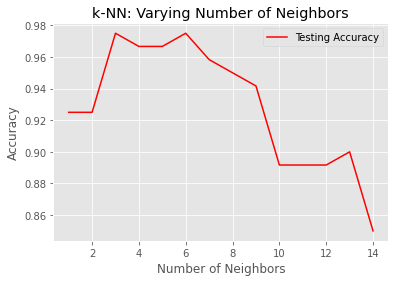

Best K Value is 3 with 0.975 accuracy


In [43]:
# Verifica o melhor valor possível para a variável 'K'

neighbors_arr = np.arange(1,15)
val_accuracy = np.empty(len(neighbors_arr))
train_accuracy = np.empty(len(neighbors_arr))
max_k = 0
max_val_accuracy = 0

for i,k in enumerate(neighbors_arr):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    val_accuracy[i] = knn.score(X_val,y_val)
    if val_accuracy[i] > max_val_accuracy: 
        max_val_accuracy = val_accuracy[i]
        max_k = k
    
plt.figure()
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors_arr, val_accuracy, 'r', label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

print(f"Best K Value is {max_k} with {max(val_accuracy)} accuracy")

In [44]:
# Definindo o modelo final
knn = KNeighborsClassifier(n_neighbors = max_k)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [45]:
# Testando algumas entradas no modelo
X_test = np.array([[5.6,2.8,3.9,1.1],[5.7,2.6,3.8,1.3],[4.7,3.2,1.3,0.2]])
predict = knn.predict(X_test)
print(predict)

[1 1 0]
